In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import matplotlib.pyplot as plt

In [6]:
posts = pd.read_csv('post_img_polarity.csv.gz', encoding='latin-1')
len(posts), posts.columns

posts['img_polarity'] = posts['img_polarity'].values.astype(int)
posts = posts[posts['img_polarity'] >= 0]

posts['polarity'] = posts['polarity'].values.astype(int)
posts = posts[posts['polarity'] >= 0]

In [26]:
# Ajustar a polaridade conforme img_polarity

def polarity(post):
    if post['polarity'] > 5:
        return 2 #positive
    elif post['polarity'] < -0:
        return 0 #negative
    else:
        return 1 #neutral

posts['post_polarity'] = posts.apply(polarity, axis=1)

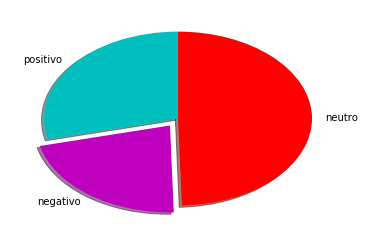

In [21]:
# Pie Chart

# Distribuição de sentimetos nas imagens 

posI = posts[posts['img_polarity'] == 2]
neuI = posts[posts['img_polarity'] == 1]
negI = posts[posts['img_polarity'] == 0]

fatiasI = [len(posI),len(negI),len(neuI)]
polaridadeI = ['positivo','negativo','neutro']
colunasI = ['c','m','r']

plt.pie(fatiasI, labels = polaridadeI, colors = colunasI, startangle = 90, shadow = True, explode = (0,0.1,0))
plt.show()


In [22]:
fatiasI

[4733, 3562, 8146]

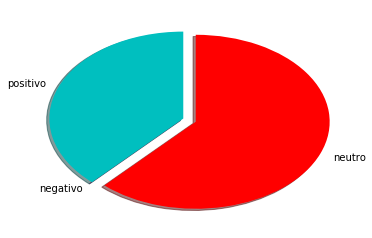

In [23]:
# Pie Chart

# Distribuição de sentimetos no texto

posT = posts[posts['post_polarity'] == 2]
neuT = posts[posts['post_polarity'] == 1]
negT = posts[posts['post_polarity'] == 0]

fatiasT = [len(posT),len(negT),len(neuT)]
polaridadeT = ['positivo','negativo','neutro']
colunasT = ['c','m','r']

plt.pie(fatiasT, labels = polaridadeT, colors = colunasT, startangle = 90, shadow = True, explode = (0,0,0.1))
plt.show()

In [25]:
fatiasT

[6258, 0, 10183]

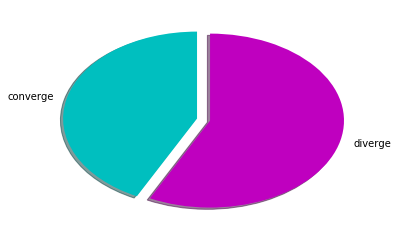

In [16]:
# Bar Chart

# Divergências

def divergeImgTxt(data):
    diverge = []
    for rows in range(len(data)):
        #if data.iloc[rows].img_polarity == data.iloc[rows].polarity:
        if data.iloc[rows].img_polarity == data.iloc[rows].post_polarity:
            diverge.append(1)
        else:
            diverge.append(0)
    data['divergence'] = diverge
    return data

post = divergeImgTxt(posts)


conv = post[post['divergence'] == 1]
div = post[post['divergence'] == 0]

fatiasIT = [len(conv),len(div)]
polaridadeIT = ['converge','diverge']
colunasIT = ['c','m']

plt.pie(fatiasIT, labels = polaridadeIT, colors = colunasIT, startangle = 90, shadow = True, explode = (0,0.1))
plt.show()


In [17]:
post

,Unnamed: 0,Unnamed: 0.1,funct,pronoun,ppron,i,we,you,shehe,they,...,assent,nonfl,filler,post.id,blog.id,polarity,img_polarity,img,divergence,post_polarity
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7930337763964362012,1600009401538636752,0,1,4.bp.blogspot.com/-jVYHG0R0D-k/WH_-a2UXwbI/AAA...,1,1
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4761201206458687372,1600009401538636752,0,2,4.bp.blogspot.com/-3EoATnT89Xs/WH_9ScXDzoI/AAA...,0,1
2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1297033737519073131,1600009401538636752,0,2,2.bp.blogspot.com/-3AQ5yrUxmUc/WH__GFMFyMI/AAA...,0,1
3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3752176386259709592,1600009401538636752,0,1,3.bp.blogspot.com/-s41H9n3wkHI/WHglRcxd2yI/AAA...,1,1
4,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,366122772010640534,1600009401538636752,0,1,2.bp.blogspot.com/-Rz9EONHW5Ro/WIKVE-yBqiI/AAA...,1,1
5,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1111121762829297836,1600009401538636752,0,1,4.bp.blogspot.com/-vsy4e4VHzI8/WH_99x8vZ0I/AAA...,1,1
6,6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2670870503763085410,1600009401538636752,0,1,3.bp.blogspot.com/-oe7y2rtjU_Q/WH1eb4Tam0I/AAA...,1,1
7,7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3372396191575169328,1600009401538636752,0,2,1.bp.blogspot.com/-AU_CBmDtCJw/WHgOOhCDq5I/AAA...,0,1
8,8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,606580882249265187,1600009401538636752,0,1,4.bp.blogspot.com/-BjT5jaDRx6g/WH1vQPt4UsI/AAA...,1,1
9,9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3172877235548797549,1600009401538636752,0,1,1.bp.blogspot.com/-c0AVsn70V8E/WHbBnG_Z1KI/AAA...,1,1
